In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [6]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


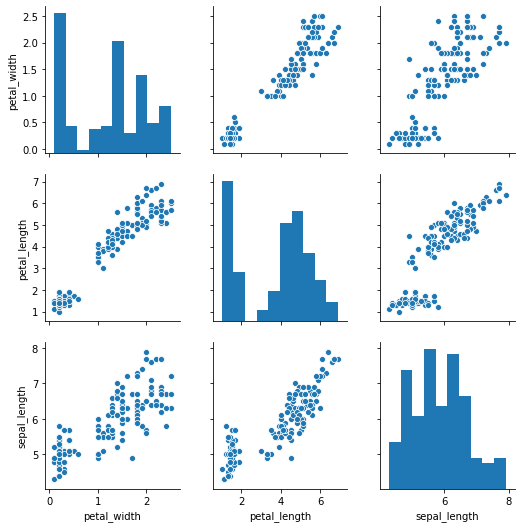

In [7]:
sns.pairplot(iris[['petal_width','petal_length','sepal_length']].dropna(how='any',axis=0))

In [8]:
x=iris[["petal_length","sepal_length"]]
y=sm.add_constant(x)
y=iris['petal_width']
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())

C:\Users\91938\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              3567.
Date:                Mon, 11 May 2020   Prob (F-statistic):                   6.19e-126
Time:                        15:33:12   Log-Likelihood:                          26.791
No. Observations:                 150   AIC:                                     -49.58
Df Residuals:                     148   BIC:                                     -43.56
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

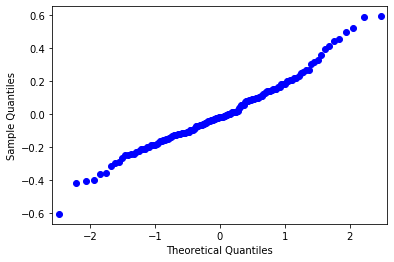

In [9]:
res=results.resid
sm.qqplot(res)
plt.show()

In [10]:
corr=x.corr()
print(corr)

              petal_length  sepal_length
petal_length      1.000000      0.871754
sepal_length      0.871754      1.000000


In [11]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [12]:
name=['Lagrange multiplier statistic','p_value','f_value','f p_value']
test=sms.het_breuschpagan(results.resid,results.model.exog)
lzip(name,test)

[('Lagrange multiplier statistic', 57.61063248046169),
 ('p_value', 3.1949387021955793e-14),
 ('f_value', 46.143695081066504),
 ('f p_value', 2.662406637697701e-16)]

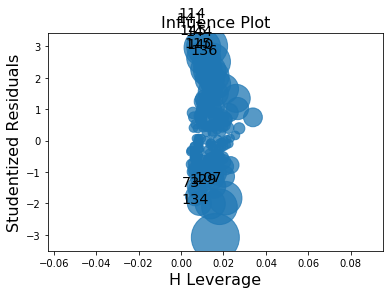

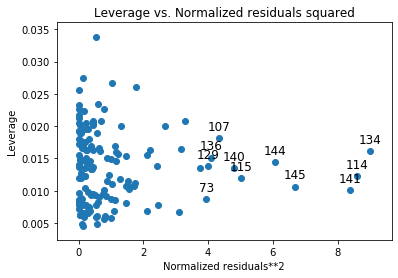

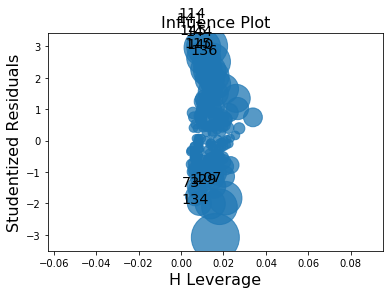

In [13]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
influence_plot(results)

In [14]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [15]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
x=iris.sepal_length
y=iris.petal_length
from sklearn import linear_model

In [17]:
lr=linear_model.LinearRegression()

In [18]:
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>


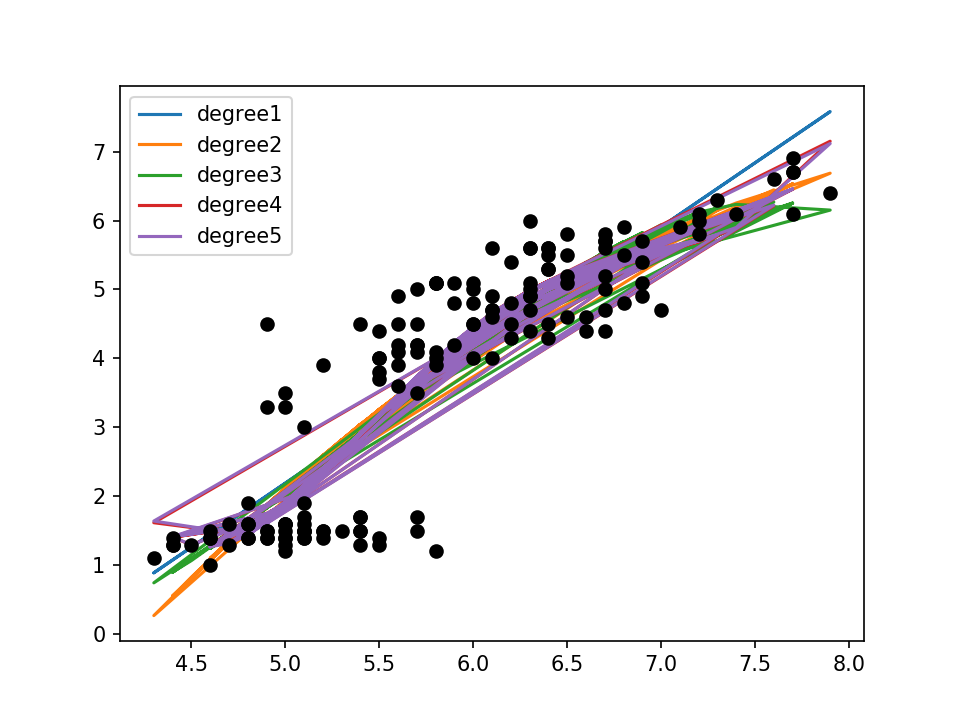

0.759954645772515
0.7773925209408674
0.7829741899795442
0.7988703254837917
0.7988831948262809


In [32]:
for deg in [1,2,3,4,5]:
    lr.fit(np.vander(x,deg+1),y);
    y_lr=lr.predict(np.vander(x,deg+1))
    plt.plot(x,y_lr,label='degree'+str(deg));
    plt.legend(loc=2);
    print(r2_score(y,y_lr))
plt.plot(x,y,'ok')